# Аналитика данных с помощью pandas и matplotlib

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.

Минимальные баллы для зачёта по этой работе - 1 балл. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд<br> (см. слайды с семинара №1)

 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация по matplotlib](https://matplotlib.org/index.html)

## 1. Данные (2 балла)

Начнем с необходимых приготовлений.

In [81]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
from IPython.display import Image

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [82]:
coins = pd.read_csv('coins.csv', index_col='date')
coins

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08


Посмотрим что получилось

In [83]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [84]:
len(coins['name'].unique())

70

#### 2. За какой период данные мы имеем? (0.4 балла)

In [85]:
coins.index.is_monotonic, coins.index[0], coins.index[len(coins) - 1] 

(True, '2013-04-28', '2018-06-06')

Поскольку индексы расположены в порядке возрастания по времени, можно посмотреть на первую и последнюю ячейку индексов.

#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? (0.5 балла)

In [86]:
coins.isnull().sum()

price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

Некоторые догадки: пропуски в txVolume, activeAddresses может свидетельствовать об отсутствии транзакций той или иной монеты. (либо, если существуют какие-то официальные торговые площадки, транзакции проводились в неотслеживаемом месте? непонятно). Пропуски в price: если взять какую-нибудь непопулярную валюту, ее мог кто-то скупить целиком, а что с ценой - непонятно (т.к. на конец торгов ее уже не существовало на открытом рынке)

#### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [87]:
coins[coins['price']==coins['price'].max()]['name']


date
2017-12-17    Bitcoin
Name: name, dtype: object

Максимальная цена была у Bitcoin 17-го декабря 2017 года.

#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

In [88]:
ind = 0
coins_cap = pd.DataFrame(columns=['name', 'sum_market'])
for coin in coins['name'].unique(): 
    #print(coin, coins[coins['name'] == coin]['market'].sum())
    coins_cap.loc[ind, 'name'] = coin
    coins_cap.loc[ind, 'sum_market'] = coins[coins['name'] == coin]['market'].sum()
    ind += 1

In [89]:
coins_cap[coins_cap['sum_market']==coins_cap['sum_market'].max()]['name']

0    Bitcoin
Name: name, dtype: object

In [90]:
coins_cap[coins_cap['sum_market']==coins_cap['sum_market'].min()]['name']

47    KingN Coin
Name: name, dtype: object

Максимальная суммарная капитализация у Bitcoin, минимальная - у KingN Coin.

###### Цветовая пауза!

In [91]:
from random import randint
colors = []

for i in range(70):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

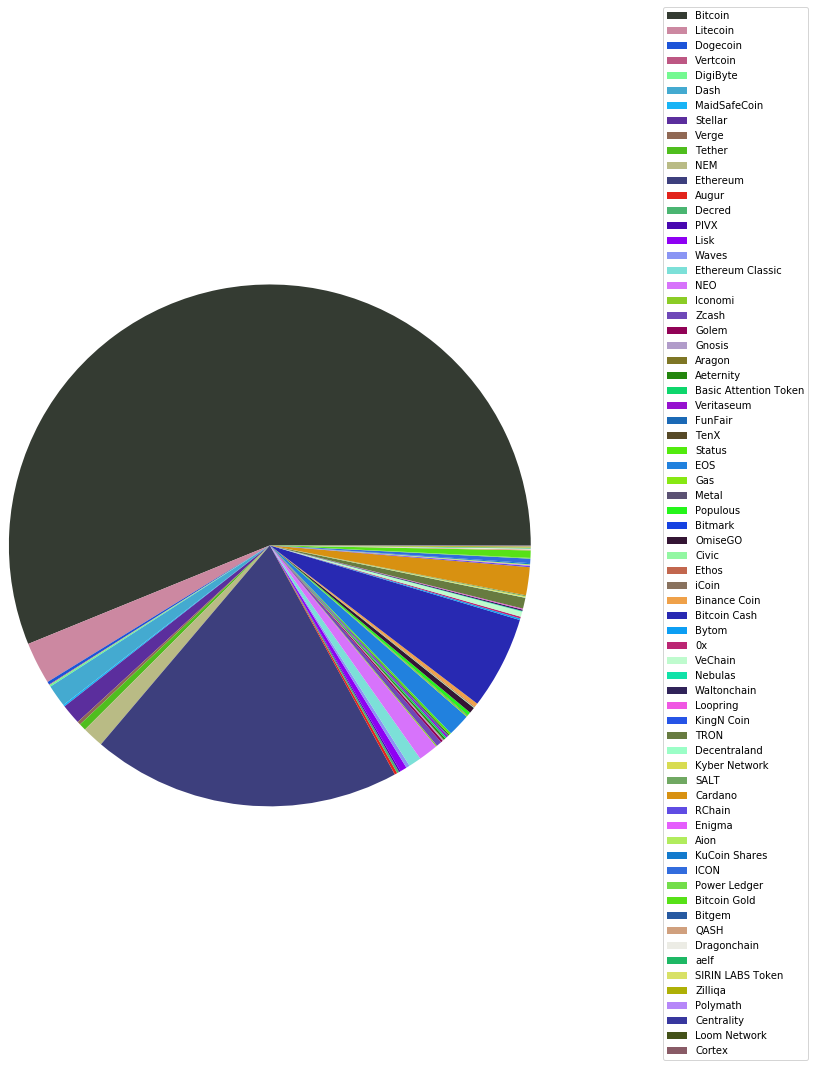

In [92]:
plt.pie(
    coins_cap['sum_market'], radius = 3, colors = colors
)

plt.legend(loc='upper right', bbox_to_anchor = (3, 3),
    labels = coins_cap['name'] )
plt.show()


Не очень красиво, но что поделать! Людям не нужно было изобретать 70 видов битков, мы бы спокойно обошлись бы одними доге :)

In [238]:
display(Image(url='https://i.pinimg.com/736x/53/2f/5f/532f5fed123d547745bb5b4cb181082e.jpg', 
              width = 200)
       ) 

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [239]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    coins_ohlc = coins[(coins['symbol'] == symbol) & (coins.index >= start_date) & (coins.index <= end_date)].copy()
    x = coins_ohlc.index.tolist()
    open_price = coins_ohlc['open']
    close_price = coins_ohlc['close']
    high_price = coins_ohlc['high']
    low_price = coins_ohlc['low']
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.set_title("А как там с {} обстоит вопрос? В период с {} по {}".format(symbol, start_date, end_date), fontsize=20)
    
    ax.plot(x, open_price, x, close_price, x, high_price, x, low_price)
    ax.set_xticks(x[::10])
    ax.set_xticklabels(
    [x[i] for i in range(0, len(x), 10)],  
    rotation=45,  
    fontsize=10,
    
)
    ax.grid(True, axis='x', color='lightgrey')
    ax.grid(True, axis='y', color='lightgrey')
    
    ax.set_ylabel('Цена в USD', color='grey', fontsize=20)
    ax.set_xlabel('Дата торгов', color='grey', fontsize=20)
    plt.show()
    

Посмотрим, что получилось:

C:\Users\papa_furanku\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\papa_furanku\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


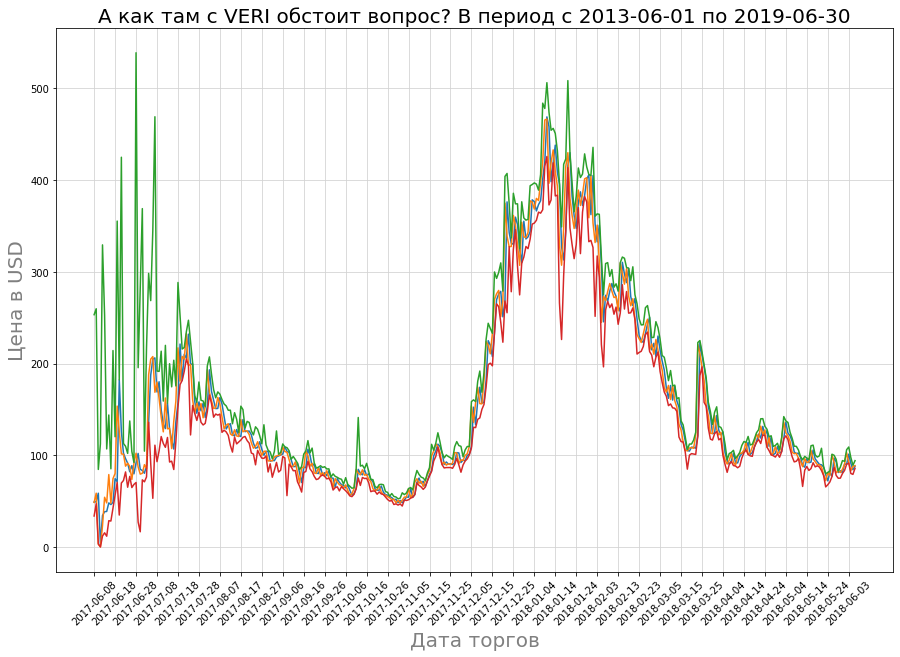

In [240]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [241]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    coins_pnd = coins[(coins['symbol'] == symbol) & (coins.index >= start_date) & (coins.index <= end_date)].copy()
    coins_pnd['pnd'] = coins_pnd.apply(lambda x: x['high']/max(x['close'], x['open']), axis=1) 
    
    return coins_pnd['pnd'].max(), coins_pnd.index[coins_pnd['pnd'] == coins_pnd['pnd'].max()]

In [242]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

(1.1428940004366206, Index(['2017-11-29'], dtype='object', name='date'))

#### Сравните эти значения для разных монет.

In [243]:
coins_pnd_all = pd.DataFrame()
coins_pnd_all['symbol'] = coins['symbol'].unique().copy()
coins_pnd_all['max_pnd'] = coins_pnd_all.apply(lambda x: find_most_severe_pump_and_dump(coins, x['symbol'],'2013-04-28', '2018-06-01'), axis = 1)    

In [244]:
coins_pnd_all['max_pnd'].max(), coins_pnd_all['symbol'][coins_pnd_all['max_pnd'] == coins_pnd_all['max_pnd'].max()]

((33.549253731343285, Index(['2017-06-11'], dtype='object', name='date')),
 26    VERI
 Name: symbol, dtype: object)

In [245]:
coins_pnd_all['max_pnd'].min(), coins_pnd_all['symbol'][coins_pnd_all['max_pnd'] == coins_pnd_all['max_pnd'].min()]

((1.1428571428571428, Index(['2018-04-24'], dtype='object', name='date')),
 65    CTXC
 Name: symbol, dtype: object)

Мало о чем говорит, но вот, что-то получилось)

In [202]:
display(Image(url='http://img0.reactor.cc/pics/comment/%D0%B3%D0%B8%D1%84%D0%BA%D0%B8-%D1%81%D0%B2%D0%B0%D1%80%D0%BE%D1%87%D0%BD%D1%8B%D0%B9-%D1%88%D0%BE%D0%B2-%D0%BA%D0%B0%D1%80%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F-%D1%81%D0%B2%D0%B0%D1%80%D0%BA%D0%B0-3486106.jpeg', 
              width = 200)
       ) 

## 4. Окупаемость инвестиций (1 балл)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

План действий: 
1) для каждой монеты посчитать, сколько монет (вложения в деньгу/цена деньги на старте)
2) найти цену деньги на конце
3) посмотреть наличность как цену деньги * цену деньги на конце
4) найти разницу между наличностью и вложением и для всех монет эту разницу посчитать
формула примерно сум по деньгам(вложение(мон) - вложение(мон) * (цена в начале)/(цена в конце)) / (сумма влож)

In [235]:
def compute_roi(coins, investments, start_date, end_date):
    summ_delta = 0
    summ_begin = 0
    for coin, price in investments.items():
        price_start = coins[(coins.index == start_date) & (coins['symbol'] == coin)]['price']
        price_end = coins[(coins.index == end_date) & (coins['symbol'] == coin)]['price']
        # summ_delta += price * (coins[(coins.index == end_date) & (coins['symbol'] == coin)]['price']) / (coins[(coins.index == start_date) & (coins['symbol'] == coin)]['price']) - price 
        summ_delta += price * (price_end / float(price_start)) - price
        summ_begin += price
    pbk = summ_delta / summ_begin 
        
    return pbk

In [236]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

date
2018-06-01   -0.035569
Name: price, dtype: float64

In [237]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

date
2018-06-06    51.283303
Name: price, dtype: float64

Кто ж знал, что если делить на float64, будет получаться нан... (здесь убито полчаса времени и криков) 

На этом мои полномочия всё. ㅠㅠ

## 5. Технический анализ (1 балл)

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение за N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [24]:
def plot_bollinger_bands(coins, symbol, window, width):
    # Paste your code here

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

#### Сделайте вывод о том, выполнялось ли правило Боллинджера.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [26]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Paste your code here

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

#### Проанализируйте зависимость доли капитализации альткойнов от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

## 7. Корреляции монет (1 балл)

#### Теперь нужно подробнее посмотреть на корреляции средних капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

In [28]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия основанная на скользящих средних. Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае. Посмотрим на пример

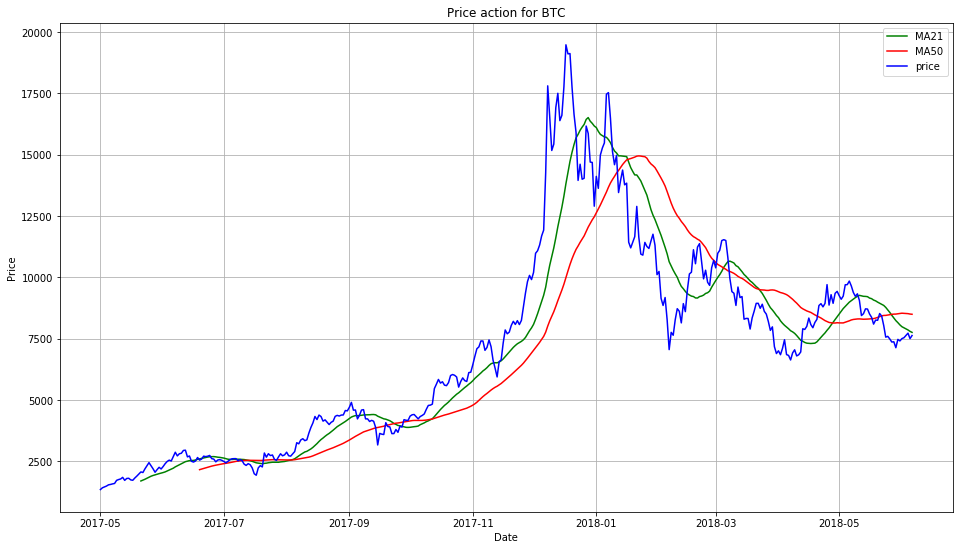

In [31]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что для скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.
#### Реализуйте функцию, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании 

#### Notes:
Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод shift(1) у Series.
Отношение цен закрытия за сегодня и за вчера - это мой multiplier за сегодняшний день. При этом давайте строить графики накопления для multipliers. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй- 0.5 и в третий 2. То график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).

При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый threshold (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [32]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

#### Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели.

## 9. Отказ от ответственности 
Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.

![Disclamer](https://i0.kym-cdn.com/entries/icons/mobile/000/024/785/Screen_Shot_2017-11-30_at_1.12.37_PM.jpg)